### Importación de datos



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
lista_tiendas= [tienda, tienda2, tienda3, tienda4]

for i in range(len(lista_tiendas)):
  facturacion = sum(list(lista_tiendas[i].Precio))
  print(f'La tienda {i+1} facturo: ${facturacion}')

La tienda 1 facturo: $1150880400.0
La tienda 2 facturo: $1116343500.0
La tienda 3 facturo: $1098019600.0
La tienda 4 facturo: $1038375700.0


In [36]:
def calcular_facturacion(lista):
  facturacion_tiendas = []
  for i in range(len(lista)):
    facturacion = sum(list(lista[i].Precio))
    facturacion_tiendas.append(facturacion)
  return facturacion_tiendas

# 2. Ventas por categoría

In [ ]:
lista_tiendas= [tienda, tienda2, tienda3, tienda4]

In [57]:
lista_categorias = list(set(tienda['Categoría del Producto']))
for tienda in lista_tiendas:
  lista_vendidos = []
  for categoria in lista_categorias:
    contador_categoria = 0
    for i in range(len(tienda)):
      if tienda['Categoría del Producto'][i] == categoria:
        contador_categoria += 1
    lista_vendidos.append((categoria,contador_categoria))
  print(lista_vendidos)

[('Juguetes', 338), ('Artículos para el hogar', 201), ('Instrumentos musicales', 170), ('Electrónicos', 451), ('Libros', 187), ('Muebles', 480), ('Deportes y diversión', 277), ('Electrodomésticos', 254)]
[('Juguetes', 313), ('Artículos para el hogar', 181), ('Instrumentos musicales', 224), ('Electrónicos', 422), ('Libros', 197), ('Muebles', 442), ('Deportes y diversión', 275), ('Electrodomésticos', 305)]
[('Juguetes', 315), ('Artículos para el hogar', 177), ('Instrumentos musicales', 177), ('Electrónicos', 451), ('Libros', 185), ('Muebles', 499), ('Deportes y diversión', 277), ('Electrodomésticos', 278)]
[('Juguetes', 338), ('Artículos para el hogar', 201), ('Instrumentos musicales', 170), ('Electrónicos', 451), ('Libros', 187), ('Muebles', 480), ('Deportes y diversión', 277), ('Electrodomésticos', 254)]


In [ ]:
def listar_categorias(lista):
    resultados_por_tienda = []

    for tienda in lista_tiendas:
        lista_categorias = list(set(tienda['Categoría del Producto']))
        lista_vendidos = []

        for categoria in lista_categorias:
            contador_categoria = 0
            for i in range(len(tienda['Categoría del Producto'])):
                if tienda['Categoría del Producto'][i] == categoria:
                    contador_categoria += 1
            lista_vendidos.append((categoria, contador_categoria))

        resultados_por_tienda.append(lista_vendidos)

    return resultados_por_tienda

# 3. Calificación promedio de la tienda


In [ ]:
lista_tiendas= [tienda, tienda2, tienda3, tienda4]
promedio_calificaciones = []
for tienda in lista_tiendas:
  promedio = round((sum(tienda['Calificación'])/len(tienda['Calificación'])),3)
  promedio_calificaciones.append(promedio)
print(promedio_calificaciones)

[3.996, 4.037, 4.048, 3.996]


In [38]:
def calcular_calificaciones(lista):
  promedio_calificaciones = []
  for tienda in lista:
    promedio = round((sum(tienda['Calificación'])/len(tienda['Calificación'])),3)
    promedio_calificaciones.append(promedio)
  return promedio_calificaciones

# 4. Productos más y menos vendidos

In [ ]:
lista_tiendas= [tienda, tienda2, tienda3, tienda4]

In [ ]:
lista_productos = list(set(tienda['Producto']))
for tienda in lista_tiendas:
  lista_vendidos = []
  for producto in lista_productos:
    contador_producto = 0
    for i in range(len(tienda)):
      if tienda['Producto'][i] == producto:
        contador_producto += 1
    lista_vendidos.append((producto,contador_producto))
  lista_vendidos = sorted(lista_vendidos, key=lambda x: x[1], reverse=True)

  print(lista_vendidos)

[('Cama box', 62), ('Cubertería', 59), ('Dashboards con Power BI', 56), ('Cama king', 56), ('Mesa de noche', 55), ('Carrito de control remoto', 55), ('Mesa de comedor', 55), ('Bloques de construcción', 54), ('Smart TV', 54), ('Pandereta', 52), ('Set de ollas', 50), ('Modelado predictivo', 50), ('Asistente virtual', 50), ('Balón de baloncesto', 50), ('Impresora', 50), ('Balón de voleibol', 48), ('Microondas', 48), ('Iphone 15', 48), ('Juego de mesa', 48), ('Vaso térmico', 48), ('Batería', 48), ('Muñeca bebé', 48), ('Cubo mágico 8x8', 47), ('Dinosaurio Rex', 47), ('Sofá reclinable', 47), ('Estufa', 47), ('Set de vasos', 46), ('Olla de presión', 46), ('Tablet ABXY', 45), ('Bicicleta', 45), ('Sillón', 45), ('Mesa de centro', 44), ('Auriculares', 44), ('Lavavajillas', 43), ('Cuerda para saltar', 43), ('Iniciando en programación', 43), ('Mochila', 43), ('Kit de bancas', 42), ('Auriculares con micrófono', 42), ('TV LED UHD 4K', 40), ('Secadora de ropa', 40), ('Silla de oficina', 40), ('Celula

# 5. Envío promedio por tienda

In [ ]:
lista_tiendas= [tienda, tienda2, tienda3, tienda4]

for i in range(len(lista_tiendas)):
  promedio = (round(sum(lista_tiendas[i]['Costo de envío'])/len(lista_tiendas[i]['Costo de envío'])))
  print(f'El promedio de costos de envio de la tienda{i} es de: ${promedio}')

In [39]:
def calcular_costos_envios(lista):
  costos =[]
  for i in range(len(lista)):
    promedio = (round(sum(lista[i]['Costo de envío'])/len(lista[i]['Costo de envío'])))
    costos.append(promedio)
  return costos

# 6. Graficos

## 6.1 Rendimiento de las ventas por tienda

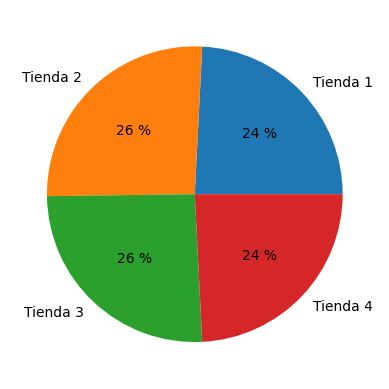

In [59]:
import matplotlib.pyplot as plt
lista_tiendas= [tienda, tienda2, tienda3, tienda4]

facturacion = calcular_facturacion(lista_tiendas)
costos_envios = calcular_costos_envios(lista_tiendas)

balance =[]
plt.figure()

for i in range(len(lista_tiendas)):
  balance.append((facturacion[i] - costos_envios[i]))

plt.pie(x=balance, labels=[f'Tienda {i+1}' for i in range(len(lista_tiendas))], autopct='%0.f %%')

plt.show()

## 6.2 Rendimiento de calificaciones por tienda

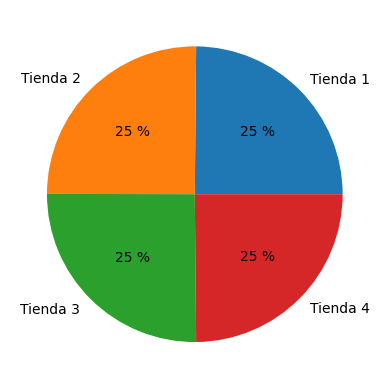

In [63]:
import matplotlib.pyplot as plt
lista_tiendas= [tienda, tienda2, tienda3, tienda4]

calificaiones = calcular_calificaciones(lista_tiendas)

plt.figure()

plt.pie(x=calificaiones, labels=[f'Tienda {i+1}' for i in range(len(lista_tiendas))], autopct='%0.f %%')

plt.show()

## 6.3 Dinero recaudado por producto

In [66]:
import matplotlib.pyplot as plt

def generar_grafico_torta(lista):
  for tienda in lista:
    plt.figure()
    recaudacion = []

    ## Recorrido por los productos para contabilizar las ventas
    for producto in lista_productos:
      acumulador = 0
      for i in range(len(tienda['Producto'])):
        if tienda['Producto'][i] == producto:
          acumulador += tienda['Precio'][i]
      recaudacion.append(int(acumulador))

    ## Creacion de las listas para ordenar las ventas de mayor recaudacion a la menor
    lista_ordenada = list(zip(lista_productos,recaudacion))
    lista_ordenada.sort(key=lambda x: x[1], reverse=True)
    top_productos = lista_ordenada[:10]
    otros_productos = [sum(otro[1] for otro in lista_ordenada[10:])]

    ## Creacion de las listas para los graficos
    valores = [valor[1] for valor in top_productos] + otros_productos
    etiquetas = [etiqueta[0] for etiqueta in top_productos] + ['Otros']

    plt.pie(x=valores, labels= etiquetas,autopct="%0.1f %%")
    plt.show()


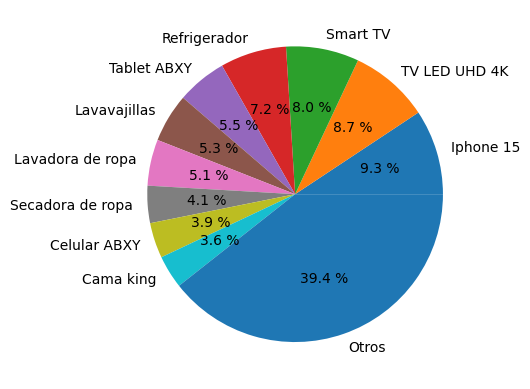

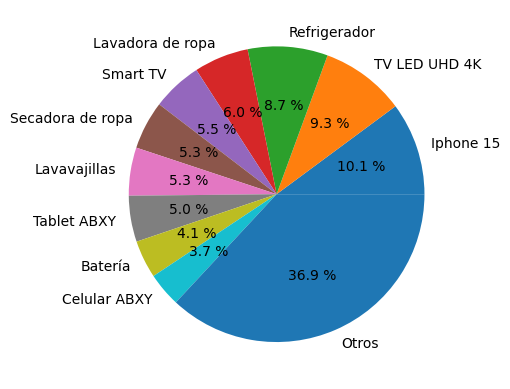

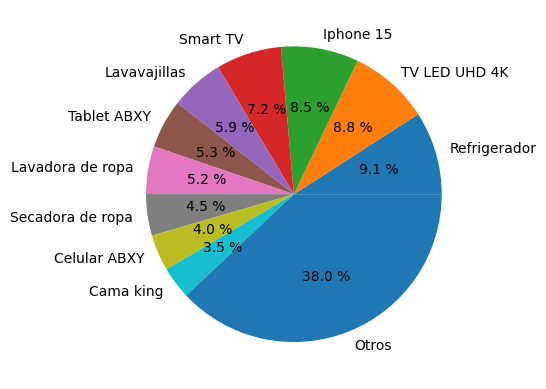

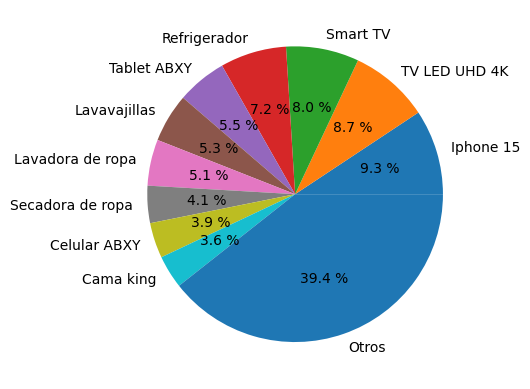

In [67]:
lista_tiendas= [tienda, tienda2, tienda3, tienda4]
lista_productos = list(set(tienda['Producto']))

generar_grafico_torta(lista_tiendas)

## 6.4 Venta de productos por categorias

In [32]:
def listar_categorias(lista):
    resultados_por_tienda = []

    for tienda in lista_tiendas:
        lista_categorias = list(set(tienda['Categoría del Producto']))
        lista_vendidos = []

        for categoria in lista_categorias:
            contador_categoria = 0
            for i in range(len(tienda['Categoría del Producto'])):
                if tienda['Categoría del Producto'][i] == categoria:
                    contador_categoria += 1
            lista_vendidos.append((categoria, contador_categoria))

        resultados_por_tienda.append(lista_vendidos)

    return resultados_por_tienda

In [33]:
import matplotlib.pyplot as plt

def generar_grafico_barras(lista):
  for venta in lista:
    plt.figure()
    categorias = [venta[0] for venta in venta]
    vendidos = [venta[1] for venta in venta]

    plt.bar(x=categorias, height=vendidos)
    plt.xticks(rotation=45, ha='right')
    plt.show()

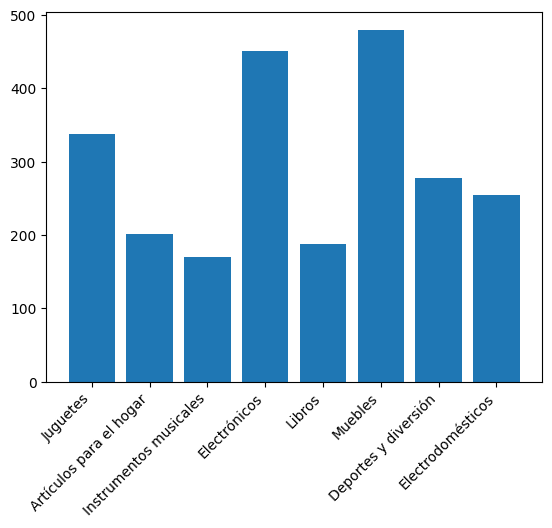

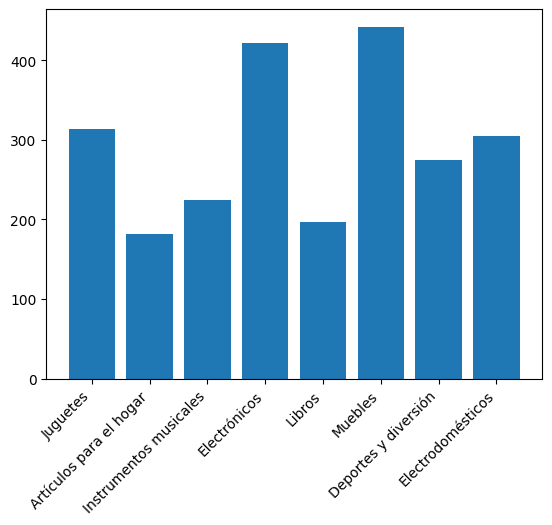

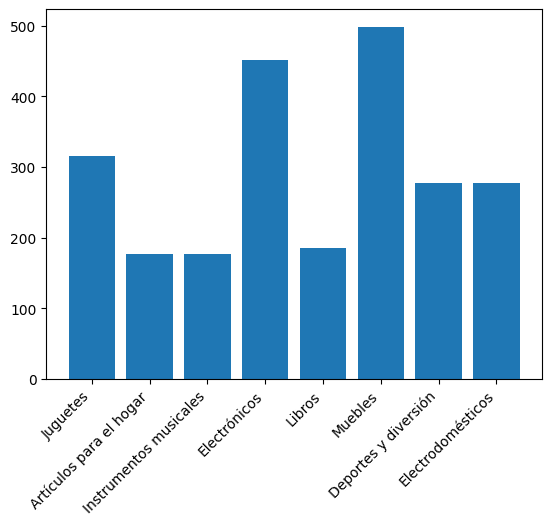

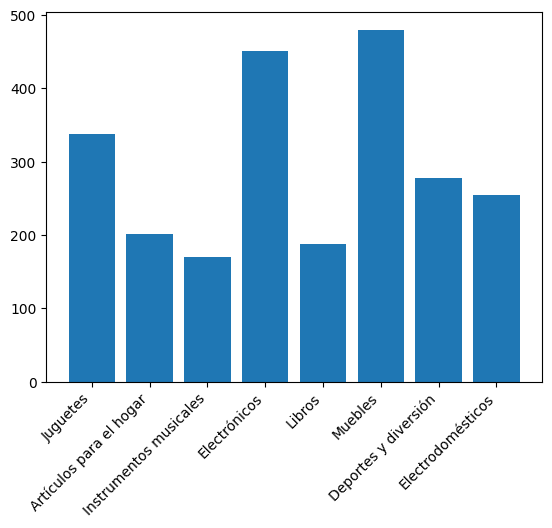

In [34]:
lista_tiendas= [tienda, tienda2, tienda3, tienda4]
lista = listar_categorias(lista_tiendas)

generar_grafico_barras(lista)

## 6.5 Calificacion segun el lugar

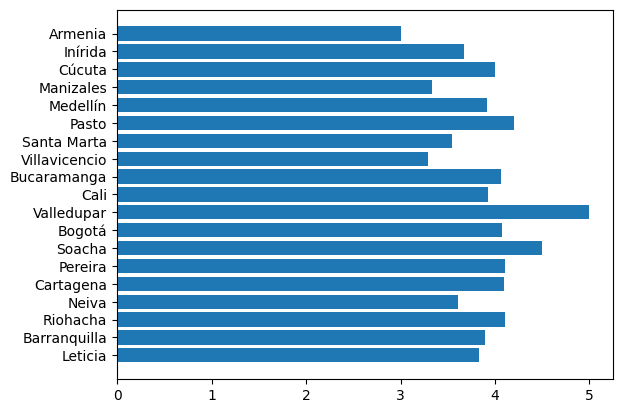

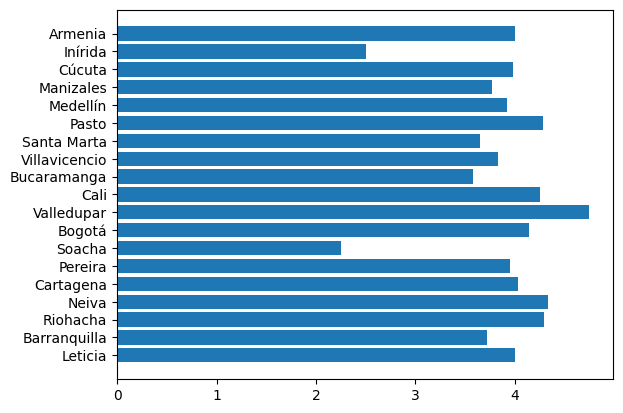

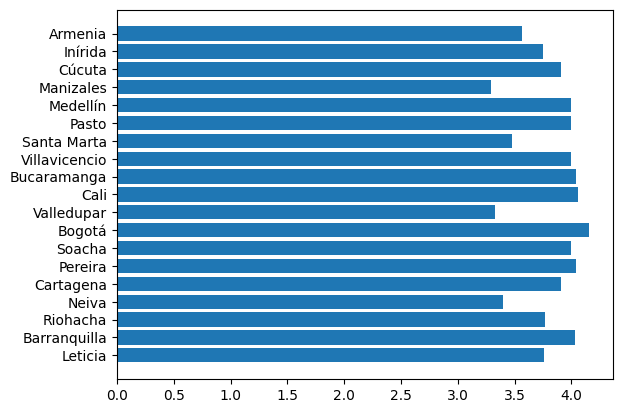

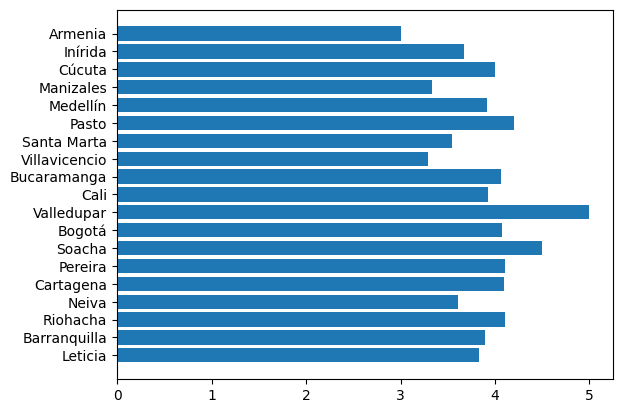

In [68]:
import matplotlib.pyplot as plt
lista_tiendas= [tienda, tienda2, tienda3, tienda4]
lista_lugares = list(set(tienda['Lugar de Compra']))

for tienda in lista_tiendas:
  plt.figure()
  calificaciones_tienda= []
  for lugar in lista_lugares:
    calificacion_lugar = []
    for i in range(len(tienda['Producto'])):
      if tienda['Lugar de Compra'][i] == lugar:
        calificacion_lugar.append(int(tienda['Calificación'][i]))
    calificaciones_tienda.append(calificacion_lugar)

  promedios = [round(float((sum(lista)/len(lista))),2) for lista in calificaciones_tienda]
  plt.barh(lista_lugares,promedios )

# 7. Informe

Luego del analisis realizado a partir de los diferentes graficos en base a los datos de cada tienda, se pude llegar a la conclusion sobre que no exisite una mejor opcion a la hora de elegir una para su respectiva venta.
En los graficos de rendimiento, realizado a partir del calculo de costo/beneficio, se puede observar que todas las tiendas comparten en mismo porcentaje de igresos respecto al total, por lo tanto, viendolo desde un lado economico puedo decir que son practicamente identicas.
A partir de esta conclusion decidi investigar sobre las calificaciones a cada una de las tiendas. Como se puede observar en el grafico 6.2, tampoco se observa una diferencia entre las calificaciones de los clientes que realizaron compras en las tiendas.

Ademas, elegi realizar un analisis mas fino en cuanto a que productos recaudan mas dinero con sus ventas (grafico 6.3) y cuales son las categorias de productos mas vendidas (graficos 6.4) para identificar si alguna tiene una discordancia con respecto a las demas.

Por ultimo, en el grafico 6.5, se pueden observar las diferentes calificaciones dependiendo del lugar de la compra y se puede visualizar, que por mas que el promedio de las calificaciones sean similares, en la tienda 4 y 3, hay una diferencia mucho mas grandes en las diferentes ciudades. Esto podria ser un indicativo de problemas en los envios o las sucursales encargadas de entregarle el producto al cliente

### Conclusion
No existe un indicativo fuerte que demuestre una razon por la cual elegir una tienda sobre la otra, las 4 tiendas demuestran un buen rendimiento en las ventas por sobre los costos de envios, teniendo como productos mas comprados los muebles y los que mas ingresos generan, los productos electronicos.
Por lo tanto, cualquier tienda seria una buena opcion para ser vendida.